<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB
None
         SquareFeet      Bedrooms     Bathrooms     YearBuilt          Price
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000
mean    2006.374680      3.498700      1.995420   1985.404420  224827.325151
std      575.513241      1.116326      0.815851     20.719377   76141.842966
min     1000.000000      2.000000      1.000000   1950.000000  -36588.165397
25%     1513.000000      3.000000      1.000000   1967.000000  169955.860225
50%     2007.000000

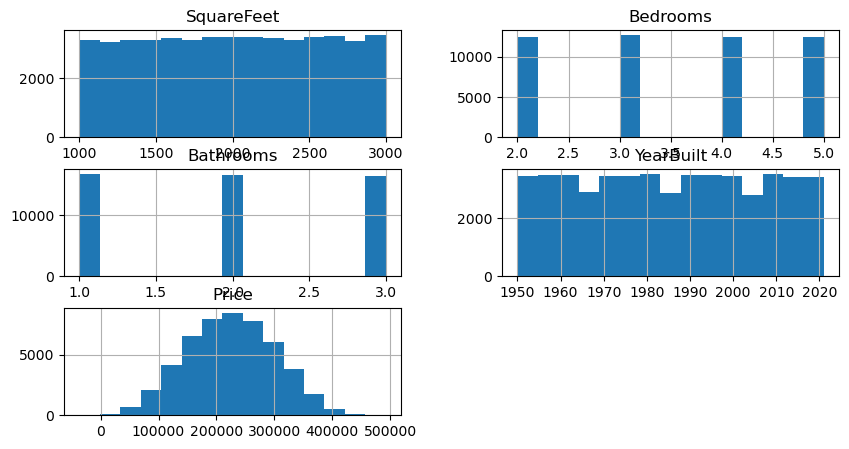

Validation Mean Squared Error: 2466605174.3086386
Test Set Predictions:
[211816.87492691 140575.3734911  256134.24126103 ... 134399.69006817
 226354.62638924 201960.476257  ]


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/bruh/Downloads/Housing Price Dataset.csv", delimiter=',')

print(df.info())
print(df.describe())
df.hist(bins=15, figsize=(10, 5))
plt.show()

X = pd.get_dummies(df.drop('Price', axis=1))
Y = df['Price']

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.33, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(Y_val, y_val_pred)
print("Validation Mean Squared Error:", val_mse)

y_test_pred = model.predict(X_test)
print("Test Set Predictions:")
print(y_test_pred)
